In [1]:
#@ IMPORTING LIBRARIES:

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#@ INSPECTION:
import tensorflow
tensorflow.__version__

'2.10.0'

In [3]:
#@ INITIALIZING PATH TO DATASET:
train_dir = './data/train'
test_dir = './data/test'

In [19]:
#@ INITIALIZING MODEL CREATION:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
#@ COMPILING THE MODEL:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [21]:
#@ SUMMARY:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [22]:
#@ INITIALIZING IMAGE DATAGENERATOR:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
#@ TRAINING DATAGENERATOR:
from random import shuffle


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    shuffle=True)

Found 3677 images belonging to 2 classes.


In [24]:
#@ VALIDATION DATAGENERATOR:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        shuffle=True)

Found 918 images belonging to 2 classes.


In [25]:
#@ INSPECTING:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [26]:
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
tensorflow.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
184/184 [==============================] - 12s 60ms/step - loss: 0.6511 - acc: 0.6005 - val_loss: 0.5917 - val_acc: 0.6667
Epoch 2/10
184/184 [==============================] - 10s 54ms/step - loss: 0.5842 - acc: 0.6908 - val_loss: 0.5662 - val_acc: 0.7157
Epoch 3/10
184/184 [==============================] - 10s 56ms/step - loss: 0.5448 - acc: 0.7313 - val_loss: 0.5354 - val_acc: 0.7233
Epoch 4/10
184/184 [==============================] - 10s 54ms/step - loss: 0.4952 - acc: 0.7729 - val_loss: 0.5108 - val_acc: 0.7767
Epoch 5/10
184/184 [==============================] - 10s 56ms/step - loss: 0.4924 - acc: 0.7775 - val_loss: 0.5285 - val_acc: 0.7429
Epoch 6/10
184/184 [==============================] - 10s 55ms/step - loss: 0.4505 - acc: 0.8034 - val_loss: 0.5025 - val_acc: 0.7625
Epoch 7/10
184/184 [==============================] - 11s 60ms/step - loss: 0.4210 - acc: 0.8197 - val_loss: 0.5491 - val_acc: 0.7288
Epoch 8/10
184/184 [==============================] - 11s 59ms

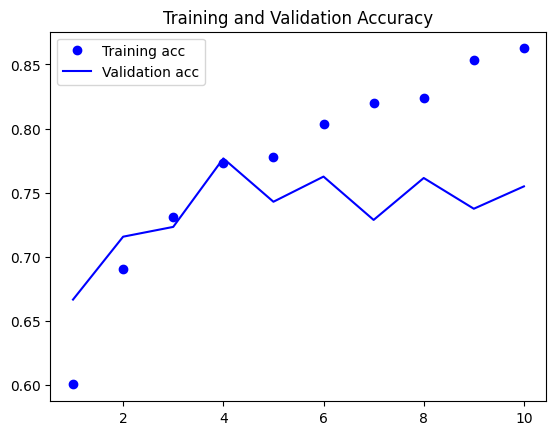

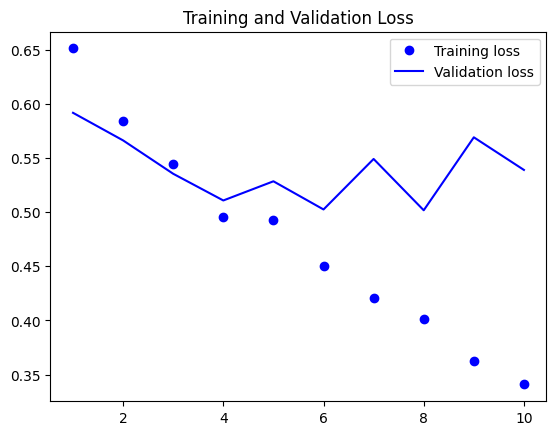

In [29]:
#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [30]:
#@ MEDIAN OF ACCURACY:
acc_median = np.median(acc)
acc_median

0.7904541790485382

In [31]:
#@ STANDARD DEVIATION OF LOSS:
loss_std = np.std(loss)
loss_std

0.09389413327826202

In [33]:
#@ INITIALIZING DATA AUGMENTATION:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [34]:
#@ TRAINING DATA GENERATOR:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [35]:
#@ TEST DATA GENERATOR:
test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
#@ INITIALIZING DATA GENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [37]:
#@ INITIALIZING DATA GENERATOR:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 918 images belonging to 2 classes.


In [38]:
#@ MODEL TRAINING WITH AUGMENTATION:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
184/184 [==============================] - 35s 192ms/step - loss: 0.5079 - acc: 0.7653 - val_loss: 0.5715 - val_acc: 0.7440
Epoch 2/10
184/184 [==============================] - 34s 183ms/step - loss: 0.4869 - acc: 0.7694 - val_loss: 0.5024 - val_acc: 0.7603
Epoch 3/10
184/184 [==============================] - 33s 177ms/step - loss: 0.4847 - acc: 0.7800 - val_loss: 0.4686 - val_acc: 0.7832
Epoch 4/10
184/184 [==============================] - 33s 177ms/step - loss: 0.4776 - acc: 0.7770 - val_loss: 0.5185 - val_acc: 0.7495
Epoch 5/10
184/184 [==============================] - 33s 178ms/step - loss: 0.4705 - acc: 0.7917 - val_loss: 0.4622 - val_acc: 0.7996
Epoch 6/10
184/184 [==============================] - 33s 177ms/step - loss: 0.4686 - acc: 0.7794 - val_loss: 0.4751 - val_acc: 0.7800
Epoch 7/10
184/184 [==============================] - 32s 176ms/step - loss: 0.4609 - acc: 0.7895 - val_loss: 0.5074 - val_acc: 0.7538
Epoch 8/10
184/184 [==============================] - 3

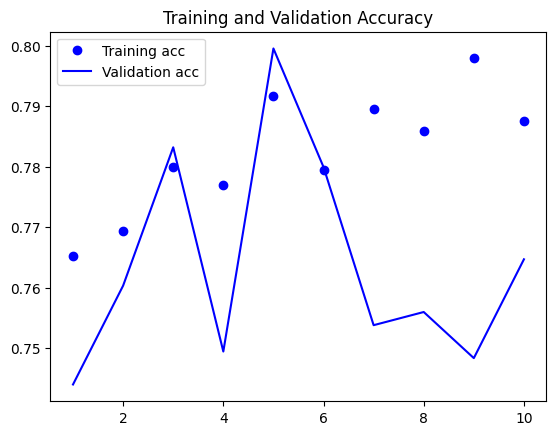

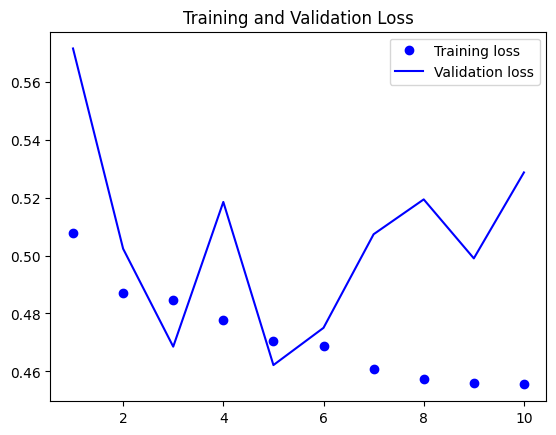

In [39]:
#@ INSPECTION ACCURACY AND LOSS:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [40]:
#@ MEAN OF VALIDATION LOSS:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.5052553802728653

In [41]:
#@ INSPECTION:
np.mean(val_acc_aug[5:10])

0.7605664372444153

In [34]:
#@ MEAN OF ACCURACY:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.8411167621612549